In [11]:
%matplotlib inline
%config Completer.use_jedi = False

In [12]:
#!pip install lxml

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

inNotebook = True # change this to True if you use a notebook
def nextplot():
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()     # and this clears the current one

### Helpers

In [14]:
from itertools import chain

def set_without_NaN(s):
    if len(s) <= 0:
        return set()
    
    s_list = list(s)
    
    if(type(s_list[0]) == list):
        s_flat_set = set(chain(*s_list))
    else:
        s_flat_set = set(s_list)  
        
    s_flat_set.discard(np.NaN)
    return s_flat_set

In [15]:
def remove_set_if_ok(s):
    if (len(s) == 0):
        return None
    # elif (len(s) == 1):
    #     return list(s)[0]
    else:
        return list(s)

In [16]:
def split_without_NaN(s):
    if pd.isnull(s):
        return []
    else:
        return [y.strip() for y in s.split(",")]

### Load and take a look at species Dataset from kaggle

In [18]:
species = pd.read_csv("../Data/species.csv", low_memory=False)
parks = pd.read_csv("../Data/parks.csv", low_memory=False)

In [19]:
colnames = list(species)
colnames

['Species ID',
 'Park Name',
 'Category',
 'Order',
 'Family',
 'Scientific Name',
 'Common Names',
 'Record Status',
 'Occurrence',
 'Nativeness',
 'Abundance',
 'Seasonality',
 'Conservation Status',
 'Unnamed: 13']

In [20]:
species = species.drop(['Record Status',
 'Occurrence',
 'Nativeness',
 'Abundance',
 'Seasonality',
 'Unnamed: 13'], axis = 1)
species

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",NaN
...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,NaN


### Replace "None" string with actual Na values

In [21]:
species.replace("None", np.NaN, inplace=True)

### Process Dataset

In [22]:
# turn Common Names into list
species['Common Names'] = species['Common Names'].apply(func=split_without_NaN)
species

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,[Moose],NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"[Northern White-Tailed Deer, Virginia Deer, Wh...",NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"[Coyote, Eastern Coyote]",Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"[Eastern Timber Wolf, Gray Wolf, Timber Wolf]",Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"[Black Fox, Cross Fox, Eastern Red Fox, Fox, R...",NaN
...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,[Cut-Leaf Nightshade],NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,[Canyon Grape],NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,[Wine Grape],NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,[Creosote Bush],NaN


In [23]:
species[species["Scientific Name"]=="Aaptolasma"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Conservation Status
24495,CUVA-2671,Cuyahoga Valley National Park,Crab/Lobster/Shrimp,Sessilia,Bathylasmatidae,Aaptolasma,[],NaN


In [24]:
species["Common Names"][1]

['Northern White-Tailed Deer', 'Virginia Deer', 'White-Tailed Deer']

In [25]:
# turn State into list (one park can be in more than on state)
parks['State'] = parks['State'].apply(func=lambda x:[y.strip() for y in x.split(",")])

In [26]:
parks

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,[ME],47390,44.35,-68.21
1,ARCH,Arches National Park,[UT],76519,38.68,-109.57
2,BADL,Badlands National Park,[SD],242756,43.75,-102.50
3,BIBE,Big Bend National Park,[TX],801163,29.25,-103.25
4,BISC,Biscayne National Park,[FL],172924,25.65,-80.08
5,BLCA,Black Canyon of the Gunnison National Park,[CO],32950,38.57,-107.72
6,BRCA,Bryce Canyon National Park,[UT],35835,37.57,-112.18
7,CANY,Canyonlands National Park,[UT],337598,38.20,-109.93
8,CARE,Capitol Reef National Park,[UT],241904,38.20,-111.17
9,CAVE,Carlsbad Caverns National Park,[NM],46766,32.17,-104.44


In [27]:
# add Location attribute ("State") from Parks dataset to Species dataset so we can match it with the location in Listed-species data  
species=species.merge(right=parks[["Park Name", "State"]], on="Park Name", how='left')

In [28]:
species

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Conservation Status,State
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,[Moose],NaN,[ME]
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"[Northern White-Tailed Deer, Virginia Deer, Wh...",NaN,[ME]
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"[Coyote, Eastern Coyote]",Species of Concern,[ME]
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"[Eastern Timber Wolf, Gray Wolf, Timber Wolf]",Endangered,[ME]
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"[Black Fox, Cross Fox, Eastern Red Fox, Fox, R...",NaN,[ME]
...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,[Cut-Leaf Nightshade],NaN,[UT]
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,[Canyon Grape],NaN,[UT]
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,[Wine Grape],NaN,[UT]
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,[Creosote Bush],NaN,[UT]


### How many Species of each Category are there?

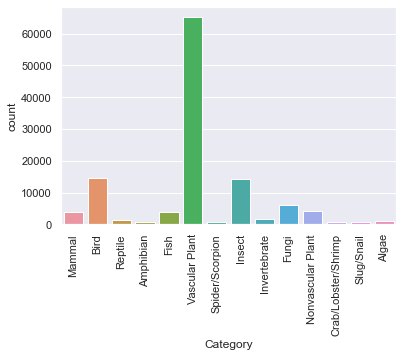

In [29]:
nextplot()

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Category", data=species)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

### Distribution of Conservation Status

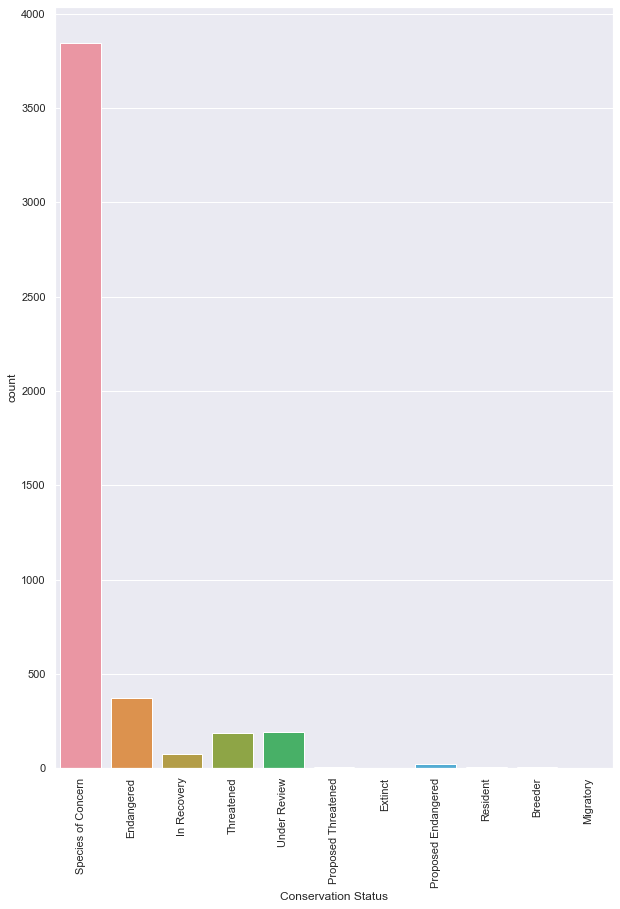

In [30]:
nextplot()

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Conservation Status", data=species)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

### How many entities have conservation Status available:

In [31]:
species.sort_values("Scientific Name").dropna(subset=["Conservation Status"])

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Conservation Status,State
47532,GRSM-2983,Great Smoky Mountains National Park,Vascular Plant,Pinales,Pinaceae,Abies fraseri,[Fraser Fir],Species of Concern,"[TN, NC]"
103178,SHEN-3244,Shenandoah National Park,Vascular Plant,Pinales,Pinaceae,Abies fraseri,"[Balsam Fir, Eastern Fir, Fraser Balsam Fir, F...",Species of Concern,[VA]
112386,YELL-1988,Yellowstone National Park,Vascular Plant,Caryophyllales,Nyctaginaceae,Abronia ammophila,"[Wyoming Sand Verbena, Yellowstone Sand Verbena]",Species of Concern,"[WY, MT, ID]"
84361,OLYM-1935,Olympic National Park,Vascular Plant,Caryophyllales,Nyctaginaceae,Abronia umbellata ssp. breviflora,"[Pink Sand Verbena, Pink Sand-Verbena]",Species of Concern,[WA]
89296,REDW-2656,Redwood National Park,Vascular Plant,Caryophyllales,Nyctaginaceae,Abronia umbellata ssp. breviflora,[Pink Sand Verbena],Species of Concern,[CA]
...,...,...,...,...,...,...,...,...,...
42631,GRCA-1656,Grand Canyon National Park,Fish,Cypriniformes,Catostomidae,Xyrauchen texanus,[Razorback Sucker],Endangered,[AZ]
10863,CANY-1330,Canyonlands National Park,Fish,Cypriniformes,Catostomidae,Xyrauchen texanus,[Razorback Sucker],Endangered,[UT]
59788,HAVO-2260,Hawaii Volcanoes National Park,Vascular Plant,Sapindales,Rutaceae,Zanthoxylum hawaiiense,"[A`E, Ae, Hea`E, Manele]",Endangered,[HI]
101468,SHEN-1534,Shenandoah National Park,Vascular Plant,Apiales,Apiaceae,Zizia trifoliata,[Mountain Golden-Alexanders],Species of Concern,[VA]


### How often do we have the same scientific name in different categories?

In [32]:
temp = species[["Scientific Name","Category"]].groupby(["Scientific Name"]).agg(func=set_without_NaN)
temp[temp["Category"].apply(func= lambda x: len(x)>1)] #Category is not always unique

,Category
Scientific Name,
Acari,"{Insect, Spider/Scorpion}"
Anemia californica,"{Insect, Vascular Plant}"
Arenaria,"{Bird, Vascular Plant}"
Argiope trifasciata,"{Insect, Spider/Scorpion}"
Callitriche,"{Insect, Vascular Plant}"
Carteria,"{Invertebrate, Nonvascular Plant}"
Collembola,"{Invertebrate, Insect}"
Ctenocephalides felis,"{Invertebrate, Insect}"
Ctenophora,"{Invertebrate, Insect}"


In [33]:
len(temp[temp["Category"].apply(func= lambda x: len(x)>1)]) #Category is not unique in 25 cases

25

### Turn into Dataframe where the same species appears only once 

In [34]:
#aggregate all other that scientific name, category into sets
clean_species = pd.DataFrame(data=species.groupby(["Scientific Name", "Category"])[['Order',
                                                                                    'Family',
                                                                                    'Park Name',
                                                                                    'Common Names',
                                                                                    'Conservation Status',
                                                                                    'State']].agg(func=set_without_NaN))

In [35]:
clean_species.loc["Arenaria"] # Arenaria is the scientific name of a bird and also a plant

,Order,Family,Park Name,Common Names,Conservation Status,State
Category,,,,,,
Bird,{Charadriiformes},{Scolopacidae},{Denali National Park and Preserve},{},{},{AK}
Vascular Plant,{Caryophyllales},{Caryophyllaceae},{Death Valley National Park},{Sandwort},{},"{CA, NV}"


In [36]:
clean_species.dropna(how='all', inplace=True) # rows where all values are Na

In [37]:
clean_species.shape

(46047, 6)

In [38]:
clean_species.head(10)

,,Order,Family,Park Name,Common Names,Conservation Status,State
Scientific Name,Category,,,,,,
Aaptolasma,Crab/Lobster/Shrimp,{Sessilia},{Bathylasmatidae},{Cuyahoga Valley National Park},{},{},{OH}
Abacidus,Insect,{Coleoptera},{Carabidae},{Rocky Mountain National Park},{},{},{CO}
Abaeis nicippe,Insect,{Lepidoptera},{Pieridae},"{Grand Canyon National Park, Rocky Mountain Na...",{Sleepy Orange},{},"{AZ, VA, CO}"
Abagrotis discoidalis,Insect,{Lepidoptera},{Noctuidae},{Great Basin National Park},{},{},{NV}
Abagrotis duanca,Insect,{Lepidoptera},{Noctuidae},{Great Basin National Park},{},{},{NV}
Abagrotis placida,Insect,{Lepidoptera},{Noctuidae},"{Rocky Mountain National Park, Great Basin Nat...",{Red Cutworm},{},"{CO, NV}"
Abagrotis vittifrons,Insect,{Lepidoptera},{Noctuidae},{Great Basin National Park},{},{},{NV}
Abama,Vascular Plant,{Dioscoreales},{Nartheciaceae},{Lake Clark National Park and Preserve},{},{},{AK}
Abama americana,Vascular Plant,{Dioscoreales},{Nartheciaceae},{Lake Clark National Park and Preserve},{},{},{AK}


In [39]:
clean_species.reset_index(level=0, inplace=True)
clean_species.head(2)

,Scientific Name,Order,Family,Park Name,Common Names,Conservation Status,State
Category,,,,,,,
Crab/Lobster/Shrimp,Aaptolasma,{Sessilia},{Bathylasmatidae},{Cuyahoga Valley National Park},{},{},{OH}
Insect,Abacidus,{Coleoptera},{Carabidae},{Rocky Mountain National Park},{},{},{CO}


In [40]:
clean_species.reset_index(level=0, inplace=True)
clean_species.head(2)

,Category,Scientific Name,Order,Family,Park Name,Common Names,Conservation Status,State
0,Crab/Lobster/Shrimp,Aaptolasma,{Sessilia},{Bathylasmatidae},{Cuyahoga Valley National Park},{},{},{OH}
1,Insect,Abacidus,{Coleoptera},{Carabidae},{Rocky Mountain National Park},{},{},{CO}


In [41]:
#Change order of colums
clean_species = clean_species[['Scientific Name',
                               'Category',
                               'Order',
                               'Family',
                               'Park Name',
                               'Common Names',                              
                               'Conservation Status',
                               'State']]

clean_species.head(10)

,Scientific Name,Category,Order,Family,Park Name,Common Names,Conservation Status,State
0,Aaptolasma,Crab/Lobster/Shrimp,{Sessilia},{Bathylasmatidae},{Cuyahoga Valley National Park},{},{},{OH}
1,Abacidus,Insect,{Coleoptera},{Carabidae},{Rocky Mountain National Park},{},{},{CO}
2,Abaeis nicippe,Insect,{Lepidoptera},{Pieridae},"{Grand Canyon National Park, Rocky Mountain Na...",{Sleepy Orange},{},"{AZ, VA, CO}"
3,Abagrotis discoidalis,Insect,{Lepidoptera},{Noctuidae},{Great Basin National Park},{},{},{NV}
4,Abagrotis duanca,Insect,{Lepidoptera},{Noctuidae},{Great Basin National Park},{},{},{NV}
5,Abagrotis placida,Insect,{Lepidoptera},{Noctuidae},"{Rocky Mountain National Park, Great Basin Nat...",{Red Cutworm},{},"{CO, NV}"
6,Abagrotis vittifrons,Insect,{Lepidoptera},{Noctuidae},{Great Basin National Park},{},{},{NV}
7,Abama,Vascular Plant,{Dioscoreales},{Nartheciaceae},{Lake Clark National Park and Preserve},{},{},{AK}
8,Abama americana,Vascular Plant,{Dioscoreales},{Nartheciaceae},{Lake Clark National Park and Preserve},{},{},{AK}
9,Abbottana clemataria,Insect,{Lepidoptera},{Geometridae},{Congaree National Park},{},{},{SC}


In [42]:
# As expected there are 25 species that have the same scientific name but are actually different species: e.g. one is a bird and one is a plant
sum(clean_species.duplicated(subset=["Scientific Name"]))

25

### Do the sets for Order, Family, Conservation Status contain more than one value? (i.e. are the Order, Family not unique to a Species?)

In [43]:
clean_species[["Scientific Name","Order"]][clean_species["Order"].apply(func= lambda x: len(x)>1)] # Order is not always unique

,Scientific Name,Order
10996,Coltricia perennis,"{Hymenochaetales, Polyporales}"
20235,Helvella lacunosa,"{Pezizales, Cantharellales}"
28083,Multiclavula mucida,"{Agaricales, Cantharellales}"


In [44]:
clean_species[["Scientific Name","Family"]][clean_species["Family"].apply(func= lambda x: len(x)>1)] # Family is not always unique

,Scientific Name,Family
1180,Aleuria aurantia,"{Pyrenemataceae, Pyronemataceae}"
1487,Amanita franchetii,"{Amanitaceae, Pluteaceae}"
1517,Amanita silvicola,"{Amanitaceae, Pluteaceae}"
10996,Coltricia perennis,"{Hymenochaetaceae, Polyporaceae}"
11204,Coprinellus micaceus,"{Psathyrellaceae, Agaricaceae}"
20235,Helvella lacunosa,"{Cantharellaceae, Helvellaceae}"
28083,Multiclavula mucida,"{Clavulinaceae, Clavariaceae}"
28173,Mycena haematopus,"{Mycenaceae, Tricholomataceae}"
30748,Otidea leporina,"{Pyrenemataceae, Pyronemataceae}"
37834,Rickenella fibula,"{Tricholomataceae, Marasmiaceae}"


In [45]:
clean_species[["Scientific Name","Conservation Status", "State"]][clean_species["Conservation Status"].apply(func= lambda x: len(x)>1)] # Conservation State is not always unique

,Scientific Name,Conservation Status,State
7211,Canis lupus,"{Threatened, In Recovery, Endangered}","{ID, NC, CA, ND, SD, ME, MT, NV, AZ, MN, TX, T..."
7418,Caretta caretta,"{Breeder, Threatened, Endangered}","{CA, FL, AK}"
9158,Charadrius melodus,"{Threatened, Endangered}","{AR, MN, FL, ME}"
9263,Chelonia mydas,"{Threatened, Endangered}","{CA, FL, HI, AK}"
11836,Crocodylus acutus,"{Resident, Threatened}",{FL}
16758,Eschrichtius robustus,"{Endangered, In Recovery}","{CA, AK}"
17037,Eumetopias jubatus,"{Endangered, In Recovery}","{CA, WA, AK}"
17628,Falco columbarius,"{Species of Concern, Resident}","{ID, UT, NC, CA, ND, SD, ME, FL, AR, MT, KY, N..."
30109,Oncorhynchus tshawytscha,"{Threatened, Endangered}","{MI, CA, WA, AK}"


### Turn sets into lists 

In [46]:
clean_species[['Order','Family','Park Name','Common Names','Conservation Status','State']] = clean_species[['Order','Family','Park Name','Common Names','Conservation Status','State']].applymap(func=remove_set_if_ok)

In [47]:
clean_species.head(10)

,Scientific Name,Category,Order,Family,Park Name,Common Names,Conservation Status,State
0,Aaptolasma,Crab/Lobster/Shrimp,[Sessilia],[Bathylasmatidae],[Cuyahoga Valley National Park],None,None,[OH]
1,Abacidus,Insect,[Coleoptera],[Carabidae],[Rocky Mountain National Park],None,None,[CO]
2,Abaeis nicippe,Insect,[Lepidoptera],[Pieridae],"[Grand Canyon National Park, Rocky Mountain Na...",[Sleepy Orange],None,"[AZ, VA, CO]"
3,Abagrotis discoidalis,Insect,[Lepidoptera],[Noctuidae],[Great Basin National Park],None,None,[NV]
4,Abagrotis duanca,Insect,[Lepidoptera],[Noctuidae],[Great Basin National Park],None,None,[NV]
5,Abagrotis placida,Insect,[Lepidoptera],[Noctuidae],"[Rocky Mountain National Park, Great Basin Nat...",[Red Cutworm],None,"[CO, NV]"
6,Abagrotis vittifrons,Insect,[Lepidoptera],[Noctuidae],[Great Basin National Park],None,None,[NV]
7,Abama,Vascular Plant,[Dioscoreales],[Nartheciaceae],[Lake Clark National Park and Preserve],None,None,[AK]
8,Abama americana,Vascular Plant,[Dioscoreales],[Nartheciaceae],[Lake Clark National Park and Preserve],None,None,[AK]
9,Abbottana clemataria,Insect,[Lepidoptera],[Geometridae],[Congaree National Park],None,None,[SC]


### Add ID and Provenance attributes

In [48]:
ids = pd.Series(["BIO" + str(i).zfill(5) for i in range(len(clean_species))], name= "ID")
provenances =  pd.Series(["BiodiversityUSNationalParks" for i in range(len(clean_species))], name= "Provenance")

clean_species = pd.concat([ids, provenances, clean_species],axis=1)
clean_species

,ID,Provenance,Scientific Name,Category,Order,Family,Park Name,Common Names,Conservation Status,State
0,BIO00000,BiodiversityUSNationalParks,Aaptolasma,Crab/Lobster/Shrimp,[Sessilia],[Bathylasmatidae],[Cuyahoga Valley National Park],None,None,[OH]
1,BIO00001,BiodiversityUSNationalParks,Abacidus,Insect,[Coleoptera],[Carabidae],[Rocky Mountain National Park],None,None,[CO]
2,BIO00002,BiodiversityUSNationalParks,Abaeis nicippe,Insect,[Lepidoptera],[Pieridae],"[Grand Canyon National Park, Rocky Mountain Na...",[Sleepy Orange],None,"[AZ, VA, CO]"
3,BIO00003,BiodiversityUSNationalParks,Abagrotis discoidalis,Insect,[Lepidoptera],[Noctuidae],[Great Basin National Park],None,None,[NV]
4,BIO00004,BiodiversityUSNationalParks,Abagrotis duanca,Insect,[Lepidoptera],[Noctuidae],[Great Basin National Park],None,None,[NV]
...,...,...,...,...,...,...,...,...,...,...
46042,BIO46042,BiodiversityUSNationalParks,Zyxaphis filifoliae,Insect,[Hemiptera],[Aphididae],[Great Basin National Park],None,None,[NV]
46043,BIO46043,BiodiversityUSNationalParks,"nr. Bledius, sp.111",Insect,[Coleoptera],[Staphylinidae],[Yellowstone National Park],None,None,"[ID, WY, MT]"
46044,BIO46044,BiodiversityUSNationalParks,nr. Cercyon sp. 26,Insect,[Coleoptera],[Hydrophilidae],[Yellowstone National Park],None,None,"[ID, WY, MT]"
46045,BIO46045,BiodiversityUSNationalParks,ormosia scleroprocta,Insect,[Diptera],[Tipulidae],[Yellowstone National Park],None,None,"[ID, WY, MT]"


### Print to xml file


In [49]:
# rename so the names fit in the schema
clean_species.rename(columns={'Scientific Name': 'Scientific Name',
                              'Park Name':'Park Names',
                              'Category':'Categories',
                              'Order':'Orders',
                              'Family':'Families',
                              'Conservation Status':'Listing Statuses',
                              'State':'States'
                             },
                    inplace = True)

In [50]:
clean_species.columns = clean_species.columns.str.replace(' ','_')

In [53]:
import  xml.etree.ElementTree as ET
from xml.dom import minidom#
import codecs


def prettify(elem):
    """Return a pretty-printed XML string for the Element.
    """
    rough_string = ET.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")



xml_root = ET.Element('Animals_And_Plants')

for _, row_data in clean_species.iterrows():
    xml_row = ET.SubElement(xml_root, 'Species')
    
    for column_name in clean_species:
        xml_column = ET.SubElement(xml_row, column_name)
        
        row_value = row_data[column_name]
        
        if column_name == "Categories":
            xml_inner = ET.SubElement(xml_column, "Category")
            xml_inner.text = str(row_value)
            
        elif type(row_value) == list:
            if column_name == "Families":
                for value in row_value:
                    xml_inner = ET.SubElement(xml_column, "Family")
                    xml_inner.text = value
            elif column_name == "Listing_Statuses":
                for value in row_value:
                    xml_inner = ET.SubElement(xml_column, "Listing_Status")
                    xml_inner.text = value
            else:
                for value in row_value:
                    xml_inner = ET.SubElement(xml_column, column_name[:-1])
                    xml_inner.text = value
                    
        else:   
            xml_column.text = str(row_value)
        



xml = prettify(xml_root)
with codecs.open("../xml/biodiversity.xml", 'w', "utf-8") as f:
    f.write(xml)

In [56]:
clean_species.to_csv("../Data/biodiversity.csv", index = False)

In [41]:
clean_species.iloc[35396]

ID                                                 BIO35396
Provenance                      BiodiversityUSNationalParks
Scientific_Name     Potamogeton gramineus var. myriophyllus
Categories                                   Vascular Plant
Orders                                        [Alismatales]
Families                                 [Potamogetonaceae]
Park_Names                      [Crater Lake National Park]
Common_Names                        [Grass-Leaved Pondweed]
Listing_Statuses                                       None
States                                                 [OR]
Name: 35396, dtype: object

In [42]:
clean_species.columns

Index(['ID', 'Provenance', 'Scientific_Name', 'Categories', 'Orders',
       'Families', 'Park_Names', 'Common_Names', 'Listing_Statuses', 'States'],
      dtype='object')